In [1]:
from setup import *

cuda:0


In [2]:
vgg_model = models.vgg11_bn(pretrained=True)
print(vgg_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [3]:
num_classes = len(classes)
model = cnn_model(vgg_model, num_classes, convert_from_dense=False)
print(model)

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace=True)
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU(inplace=True)
      (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [4]:
for name, param in model.named_parameters(): print(name, param.requires_grad)

0.0.0.weight False
0.0.0.bias False
0.0.1.weight False
0.0.1.bias False
0.0.4.weight False
0.0.4.bias False
0.0.5.weight False
0.0.5.bias False
0.0.8.weight False
0.0.8.bias False
0.0.9.weight False
0.0.9.bias False
0.0.11.weight False
0.0.11.bias False
0.0.12.weight False
0.0.12.bias False
0.0.15.weight False
0.0.15.bias False
0.0.16.weight False
0.0.16.bias False
0.0.18.weight False
0.0.18.bias False
0.0.19.weight False
0.0.19.bias False
0.0.22.weight False
0.0.22.bias False
0.0.23.weight False
0.0.23.bias False
0.0.25.weight False
0.0.25.bias False
0.0.26.weight False
0.0.26.bias False
1.0.weight True
1.0.bias True
1.1.weight True
1.1.bias True
1.4.weight True
1.4.bias True
1.5.weight True
1.5.bias True
1.8.weight True
1.8.bias True
1.9.weight True
1.9.bias True
1.12.weight True
1.12.bias True


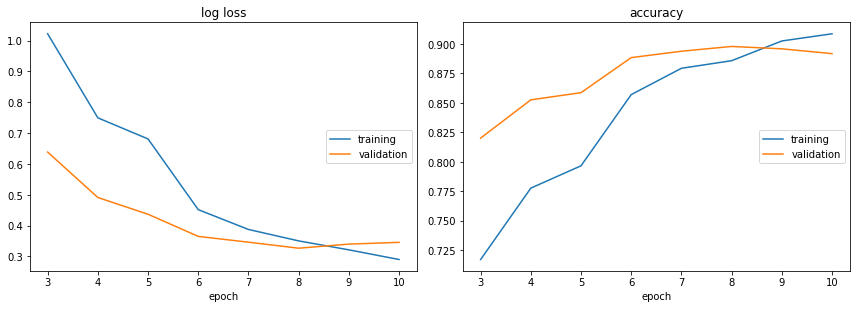

log loss:
training   (min:    0.290, max:    4.032, cur:    0.290)
validation (min:    0.327, max:    1.310, cur:    0.346)

accuracy:
training   (min:    0.335, max:    0.909, cur:    0.909)
validation (min:    0.694, max:    0.898, cur:    0.892)
Training complete in 4m 2s


In [5]:
n_epochs = 10
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=5e-3)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.2)
train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=n_epochs)

In [6]:
unfreeze_all(model.parameters())
for name, param in model.named_parameters(): print(name, param.requires_grad)

0.0.0.weight True
0.0.0.bias True
0.0.1.weight True
0.0.1.bias True
0.0.4.weight True
0.0.4.bias True
0.0.5.weight True
0.0.5.bias True
0.0.8.weight True
0.0.8.bias True
0.0.9.weight True
0.0.9.bias True
0.0.11.weight True
0.0.11.bias True
0.0.12.weight True
0.0.12.bias True
0.0.15.weight True
0.0.15.bias True
0.0.16.weight True
0.0.16.bias True
0.0.18.weight True
0.0.18.bias True
0.0.19.weight True
0.0.19.bias True
0.0.22.weight True
0.0.22.bias True
0.0.23.weight True
0.0.23.bias True
0.0.25.weight True
0.0.25.bias True
0.0.26.weight True
0.0.26.bias True
1.0.weight True
1.0.bias True
1.1.weight True
1.1.bias True
1.4.weight True
1.4.bias True
1.5.weight True
1.5.bias True
1.8.weight True
1.8.bias True
1.9.weight True
1.9.bias True
1.12.weight True
1.12.bias True


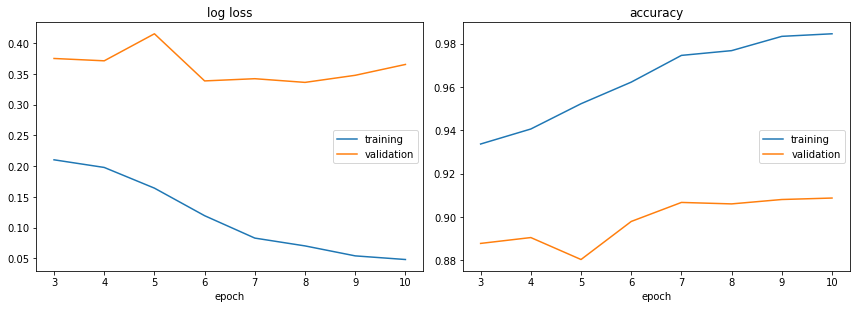

log loss:
training   (min:    0.048, max:    0.377, cur:    0.048)
validation (min:    0.336, max:    0.415, cur:    0.366)

accuracy:
training   (min:    0.885, max:    0.985, cur:    0.985)
validation (min:    0.880, max:    0.909, cur:    0.909)
Training complete in 8m 51s


In [7]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.2)
train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=n_epochs)

In [8]:
vgg_model = models.vgg11_bn(pretrained=True)
model = cnn_model(vgg_model, num_classes, convert_from_dense=True)

In [9]:
for name, param in model.named_parameters(): print(name, param.requires_grad)

0.0.0.weight False
0.0.0.bias False
0.0.1.weight False
0.0.1.bias False
0.0.4.weight False
0.0.4.bias False
0.0.5.weight False
0.0.5.bias False
0.0.8.weight False
0.0.8.bias False
0.0.9.weight False
0.0.9.bias False
0.0.11.weight False
0.0.11.bias False
0.0.12.weight False
0.0.12.bias False
0.0.15.weight False
0.0.15.bias False
0.0.16.weight False
0.0.16.bias False
0.0.18.weight False
0.0.18.bias False
0.0.19.weight False
0.0.19.bias False
0.0.22.weight False
0.0.22.bias False
0.0.23.weight False
0.0.23.bias False
0.0.25.weight False
0.0.25.bias False
0.0.26.weight False
0.0.26.bias False
1.0.weight False
1.0.bias False
1.1.weight True
1.1.bias True
1.4.weight True
1.4.bias True
1.5.weight True
1.5.bias True
1.8.weight True
1.8.bias True
1.9.weight True
1.9.bias True
1.12.weight True
1.12.bias True


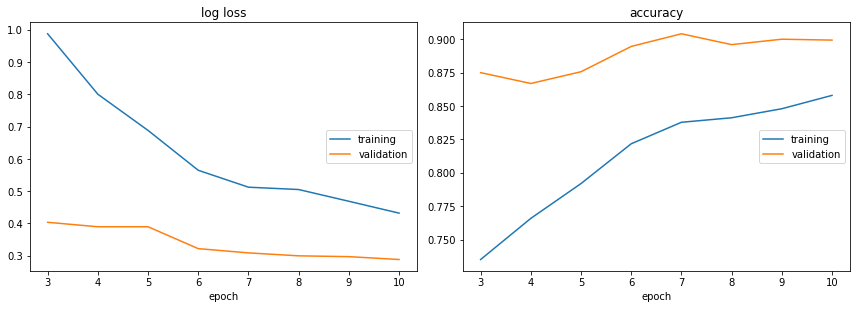

log loss:
training   (min:    0.432, max:    3.551, cur:    0.432)
validation (min:    0.288, max:    0.825, cur:    0.288)

accuracy:
training   (min:    0.501, max:    0.858, cur:    0.858)
validation (min:    0.796, max:    0.904, cur:    0.899)
Training complete in 3m 55s


In [10]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=5e-3)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.2)
train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=n_epochs)

In [11]:
unfreeze_all(model.parameters())
for name, param in model.named_parameters(): print(name, param.requires_grad)

0.0.0.weight True
0.0.0.bias True
0.0.1.weight True
0.0.1.bias True
0.0.4.weight True
0.0.4.bias True
0.0.5.weight True
0.0.5.bias True
0.0.8.weight True
0.0.8.bias True
0.0.9.weight True
0.0.9.bias True
0.0.11.weight True
0.0.11.bias True
0.0.12.weight True
0.0.12.bias True
0.0.15.weight True
0.0.15.bias True
0.0.16.weight True
0.0.16.bias True
0.0.18.weight True
0.0.18.bias True
0.0.19.weight True
0.0.19.bias True
0.0.22.weight True
0.0.22.bias True
0.0.23.weight True
0.0.23.bias True
0.0.25.weight True
0.0.25.bias True
0.0.26.weight True
0.0.26.bias True
1.0.weight True
1.0.bias True
1.1.weight True
1.1.bias True
1.4.weight True
1.4.bias True
1.5.weight True
1.5.bias True
1.8.weight True
1.8.bias True
1.9.weight True
1.9.bias True
1.12.weight True
1.12.bias True


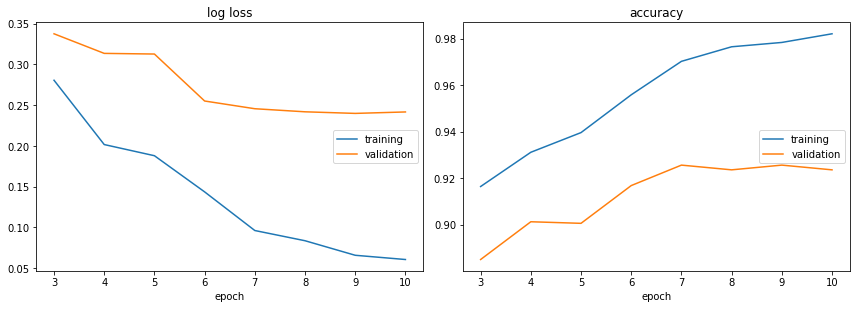

log loss:
training   (min:    0.060, max:    0.513, cur:    0.060)
validation (min:    0.240, max:    0.339, cur:    0.242)

accuracy:
training   (min:    0.838, max:    0.982, cur:    0.982)
validation (min:    0.885, max:    0.926, cur:    0.924)
Training complete in 8m 52s


In [12]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.2)
train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=n_epochs)

In [13]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

20085029